This is a notebook and associated template that allows you to filter output from entire cells by adding the `tags: ['hidden']` value to cell metadata.

It is based on http://www.damian.oquanta.info/posts/mimic-the-ipython-notebook-cell-execution.html which focused instead on just filtering output.  

If you can see a bunch of checked checkmarks on the left, then don't fear, there's a lot more text here that will explain what's going on.

We'll do this entirely with CSS rather than relying on javascript. 

This is at the cost of uniform animation smoothness. But it's still useful to see how this approach works.

In [2]:
!sed -n 1,2p toggle_hidden.tpl

{%- extends 'full.tpl' -%}



This declares which template we are extending, `full.tpl` which can be found in `nbconvert.templates.html`.

Next, we need to declare the wrapper div that will hold the original contents of the cell (invoked via `{{super()}}` and our checkbox that we'll be put off to the side of it. 

We'll be specifying that kind of placement information through the CSS calls, right now we just need to describe how we're going to change the DOM structure so we can manipulate it safely using CSS selectors.

Note that the checkboxes default to being checked.

In [10]:
!sed -n 3,4p toggle_hidden.tpl

{%- block any_cell -%}
{%- if 'hidden' in cell.metadata.get("tags",[]) -%}


Here, we're looking every cell individually at the specific level of the cell. 

For each cell, we inspect its metadata. NB: you can view and edit directly by going (inside the notebook) to View → Cell Toolbar → Edit Metadata, which will bring up a toolbar above each cell that looks vaguely like this:
![Screen%20Shot%202016-10-12%20at%2019.20.34.png](attachment://Screen%20Shot%202016-10-12%20at%2019.20.34.png)

Now, cell tagging is supported via the existence and population of the `"tags":[]` object in the metadata JSON. 

In the long run, having a better interface for applying and removing tags will be needed, but for now, if you want to test this, you'll need to edit the metadata by hand. 

We'll use this to enter the case for hiding a cell(`hidden`) vs. hiding output(`hide_output`) or hiding input(`hide_input`). Note, right now that means you can only apply one of these tags at a time. Even if you include both, the `elif` will just skip over them.
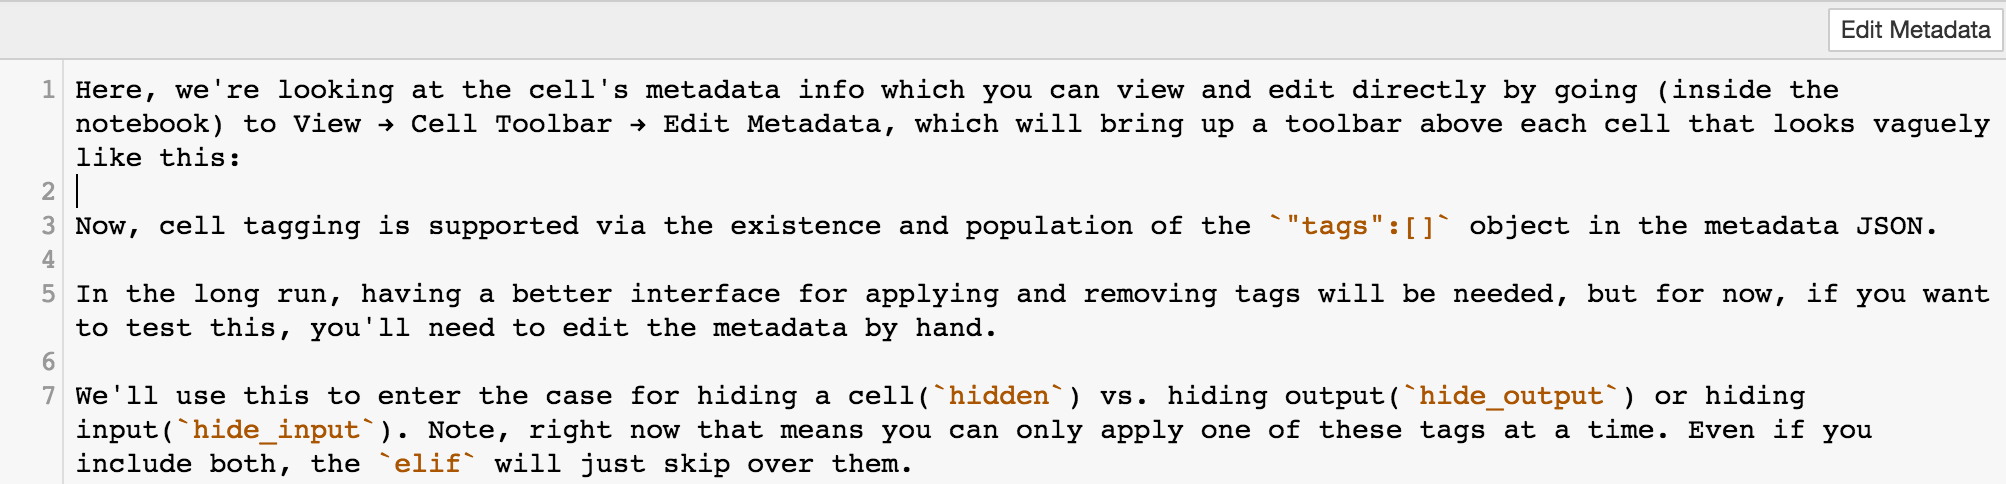

In [16]:
!sed -n 5,23p toggle_hidden.tpl

    <div class="hidden_cell">
    <input class="hide_cell" type="checkbox" checked></input>
        {{super() }}
    </div>
{%- elif 'hide_output' in cell.metadata.get("tags",[]) -%}
    <div class="hide_output_cell">
    <input class="hide_output" type="checkbox" checked></input>
        {{super() }}
    </div>
{%- elif 'hide_input' in cell.metadata.get("tags",[]) -%}
    <div class="hide_input_cell">
    <input class="hide_input" type="checkbox" checked></input>
        {{super() }}
    </div>
{%- else -%}
    {{ super() }}
{%- endif -%}
{%- endblock any_cell -%}



We add a `<div>` to wrap the checkbox and the cell contents (called via `super()`). 

The checkbox is an `<input>` element, which carries its identity as a checkbox in the attribute `type="checkbox"` along with the default value of `checked` (note it is not assigned to an attribute). 

All the `if`/`elif` logic just specifies what to do depending on which tag is present – i.e., whether hiding is going to be applying to the entire cell, the output, or the input – as they will require slightly different transformations. 

If a cell has no tag that matches our set of hiding tags, then the template just acts as a pass through. Note that  if you don't include `super()` it will replace the cell contents with nothing. 

Next comes the CSS and that's where the magic happens, so I'll break it up a bit.

In [32]:
!sed -n 24,48p toggle_hidden.tpl


{%- block header -%}
{{ super() }}

<style type="text/css">
div.hidden_cell > div.cell{
    --in-time: .5s;
    transition: max-height var(--in-time) ease-in, padding .0s step-end;
    max-height: 5000px;
}

div.hide_output_cell  div.output_wrapper{
    --in-time: .5s;
    transition: max-height var(--in-time) ease-in-out, padding .0s step-end;
    max-height: 5000px;
}

div.hide_input_cell  div.input{
    --in-time: .5s;
    transition: max-height var(--in-time) ease-in-out, padding .0s step-end;
    max-height: 5000px;
}

div.hidden_cell, div.hide_output_cell, div.hide_input_cell{ display: flex; }



Note how much code repeitition this requires. But that's essentially because we're more or less overlaying a namespace onto the Dom that we can use to filter and apply changes in only some locations.

Note that in one case (the cell level) we're specifically targeting the immediate child of the wrapper div using the immediate child selector `<`, whereas in the case with input and output filtering, we need to use a more general descendant selector.



In [31]:
!sed -n 33,48p toggle_hidden.tpl

}

div.hide_output_cell  div.output_wrapper{
    --in-time: .5s;
    transition: max-height var(--in-time) ease-in-out, padding .0s step-end;
    max-height: 5000px;
}

div.hide_input_cell  div.input{
    --in-time: .5s;
    transition: max-height var(--in-time) ease-in-out, padding .0s step-end;
    max-height: 5000px;
}

div.hidden_cell, div.hide_output_cell, div.hide_input_cell{ display: flex; }



Now… all of it together gives us:

In [27]:
!cat -n toggle_hidden.tpl

     1	{%- extends 'full.tpl' -%}
     2	
     3	{%- block any_cell -%}
     4	{%- if 'hidden' in cell.metadata.get("tags",[]) -%}
     5	    <div class="hidden_cell">
     6	    <input class="hide_cell" type="checkbox" checked></input>
     7	        {{super() }}
     8	    </div>
     9	{%- elif 'hide_output' in cell.metadata.get("tags",[]) -%}
    10	    <div class="hide_output_cell">
    11	    <input class="hide_output" type="checkbox" checked></input>
    12	        {{super() }}
    13	    </div>
    14	{%- elif 'hide_input' in cell.metadata.get("tags",[]) -%}
    15	    <div class="hide_input_cell">
    16	    <input class="hide_input" type="checkbox" checked></input>
    17	        {{super() }}
    18	    </div>
    19	{%- else -%}
    20	    {{ super() }}
    21	{%- endif -%}
    22	{%- endblock any_cell -%}
    23	
    24	
    25	{%- block header -%}
    26	{{ super() }}
    27	
    28	<style type="text/css">
    29	div.hidden_cell > div.cell{
    30	    --in-time: .5s;
    3

Then it is just a matter of including the `.tpl` in a location that nbconvert searches when it looks for templates and then including it in a command with the `--template toggle_hidden` flag when calling `jupyter nbconvert`.

For example, if you wanted to transform `the_most_hidden_notebook_ever.ipynb` (a notebook equipped with cell hiding tags) to html so using this template and immediately open it in a webpage, you would go to the command line and input: 

`jupyter nbconvert the_most_hidden_notebook_ever.ipynb --to html --template toggle_hidden --post serve`